In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import pandas as pd

from utils.train_evaluate import Trainer
from models.Base import Base
from data_ag_news.data_process.data_process_glove import DataProcess

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dp = DataProcess('../datasets/train.csv', '../datasets/test.csv', device, 512)
train_loader, test_loader = dp.get_dataLoader(141)
pre_vector = dp.get_pre_trained("glove.6B.50d.txt", '../../extra/glove_vector/')

model = Base(pre_vector, 4).to(device)
# 冻结embedding层参数
for name, param in model.named_parameters():
    if "embedding" in name:
        param.requires_grad = False

epochs = 20
lr = 1
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=3)

In [3]:
def compute_metrics_f1(predict_all, y_true):
    """f1 score评估函数"""
    predict = predict_all.argmax(-1)
    label = y_true
    acc = f1_score(label, predict, average='micro')
    return {"f1": acc}


t_and_v = Trainer(model=model, optimizer=optimizer, criterion=criterion, epochs=epochs)

metric_result = t_and_v.train(train_loader=train_loader, valid_loader=test_loader,
                              compute_metrics=compute_metrics_f1, verbose=200)
metric_result_df = pd.DataFrame(metric_result)
metric_result_df.index.name = 'epoch'
metric_result_df

Train Epoch: 0  [0    /120000 (0  %)]	Loss: 1.386984	f1: 0.273438
Train Epoch: 0  [102400/120000 (85 %)]	Loss: 0.569986	f1: 0.847656
Train Epoch: 0  [120000/120000 (100%)]	Loss: 0.513453	f1: 0.880208
----------------------------------------------------------------------------------------------------
Train Epoch: 1  [0    /120000 (0  %)]	Loss: 0.483346	f1: 0.876953
Train Epoch: 1  [102400/120000 (85 %)]	Loss: 0.458049	f1: 0.859375
Train Epoch: 1  [120000/120000 (100%)]	Loss: 0.445964	f1: 0.864583
----------------------------------------------------------------------------------------------------
Train Epoch: 2  [0    /120000 (0  %)]	Loss: 0.475826	f1: 0.843750
Train Epoch: 2  [102400/120000 (85 %)]	Loss: 0.408695	f1: 0.882812
Train Epoch: 2  [120000/120000 (100%)]	Loss: 0.415102	f1: 0.864583
----------------------------------------------------------------------------------------------------
Train Epoch: 3  [0    /120000 (0  %)]	Loss: 0.400504	f1: 0.873047
Train Epoch: 3  [102400/120000 

,Training loss,Training f1,Validation loss,Validation f1
epoch,,,,
0,0.516347,0.853092,0.522622,0.851974
1,0.452109,0.862475,0.458369,0.858421
2,0.428903,0.867600,0.435036,0.862763
3,0.417097,0.870583,0.422843,0.866447
4,0.408536,0.872317,0.414855,0.868684
5,0.401999,0.872517,0.408042,0.870526
6,0.397268,0.873033,0.404275,0.871579
7,0.396463,0.871958,0.403616,0.870789
8,0.391417,0.873967,0.398060,0.871316


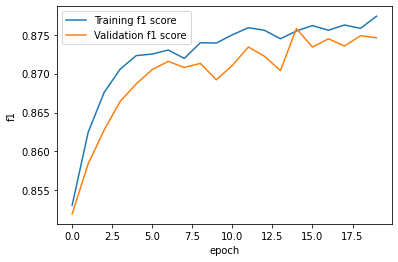

In [4]:
plt.plot(metric_result['Training f1'], label='Training f1 score')
plt.plot(metric_result['Validation f1'], label='Validation f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend()
plt.show()